### PyTorch: Three Levels of Abstraction
###### Tensor: Imperative ndarray, but runs on GPU
###### Variable: Node in a computational graph; stores data and gradient
###### Module: A neural network layer; may store state or learnable weight

##### PyTorch: Tensors
Pytorch Tensors are just like numpy arrays, but they can run on GPU.
No built-in notion of computational graph, or gradients, or deep learning.
Here we fit a two-layer net using PyTorch Tensors:

In [11]:
import numpy as np
np.random.seed(0)
import torch
dtype = torch.FloatTensor
#dtype = torch.cuda.FloatTensor

In [22]:
'''Construct inputs, outputs and weights'''
N, D_in, H, D_out = 64, 1000, 100, 10
x = torch.randn(N, D_in).type(dtype)
y = torch.randn(N, D_out).type(dtype)
w1 = torch.randn(D_in, H).type(dtype)
w2 = torch.randn(H, D_out).type(dtype)

###### Do training:

In [23]:
learning_rate = 1.e-6
t_list = []
l_list = []
for t in range(500):
    '''construct the model'''
    h = x.mm(w1)
    h_relu = h.clamp(min=0)
    y_pred = h_relu.mm(w2)
    loss = (y_pred - y).pow(2).sum()
    
    '''Compute derivatives'''
    grad_y_pred = 2. * (y_pred - y)
    grad_w2 = h_relu.t().mm(grad_y_pred)
    grad_h_relu = grad_y_pred.mm(w2.t())
    grad_h = grad_h_relu.clone()
    grad_h[h<0] = 0
    grad_w1 = x.t().mm(grad_h)
    
    '''Do updates'''
    w1 -= learning_rate* grad_w1
    w2 -= learning_rate* grad_w2
    t_list.append(t)
    l_list.append(loss)

In [24]:
print(loss)

2.7128207188101272e-05


In [25]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline 

mpl.rc('font',family='Times New Roman',size = 25)
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.minor.size'] = 2
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.minor.size'] = 2

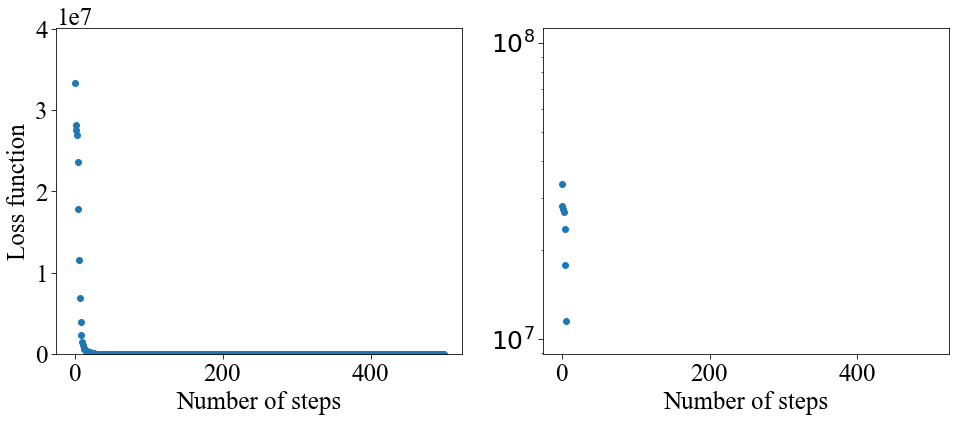

In [26]:
fig,ax  = plt.subplots(1,2,figsize=(16,6))
ax[0].scatter(t_list, l_list)
ax[0].set_xlabel("Number of steps")
ax[0].set_ylabel("Loss function")
ax[0].set_ylim((0,max(l_list)*1.2))
ax[1].scatter(t_list, l_list)
ax[1].set_xlabel("Number of steps")
#ax[1].set_ylabel("Loss function")
ax[1].set_yscale("log")
plt.show()

##### PyTorch: Autograd (variables)
A PyTorch `Variable` is a node in a computational graph;
 `x.data` is a Tensor;
 `x.grad` is a Variable of gradients (same shape as `x.data`);
 `x.grad.data` is a Tensor of gradients.

In [27]:
import torch
from torch.autograd import Variable

In [33]:
'''Construct inputs, outputs and weights'''
N, D_in, H, D_out = 64, 1000, 100, 10
x = Variable(torch.randn(N, D_in), requires_grad=False)
y = Variable(torch.randn(N, D_out), requires_grad=False)
w1 = Variable(torch.randn(D_in, H), requires_grad=True)
w2 = Variable(torch.randn(H, D_out), requires_grad=True)

In [42]:
'''Start Learning'''
learning_rate = 1.e-6
t_list = []
l_list = []
for t in range(500):
    '''Construct the layer structures'''
    y_pred = x.mm(w1).clamp(min=0).mm(w2)
    loss = (y_pred - y).pow(2).sum()
    
    '''Compute gradients'''
    if w1.grad: w1.grad.data.zero_()
    if w2.grad: w2.grad.data.zero_()
    loss.backward()
    
    '''Updates'''
    w1.data -= learning_rate * w1.grad.data
    w2.data -= learning_rate * w2.grad.data
    
    '''Collecting data'''
    t_list.append(t)
    l_list.append(loss.data)
    

RuntimeError: bool value of Variable objects containing non-empty torch.FloatTensor is ambiguous

In [41]:
print(loss.data)


nan
[torch.FloatTensor of size 1]



In [38]:
fig,ax  = plt.subplots(1,2,figsize=(16,6))
ax[0].scatter(t_list, l_list)
ax[0].set_xlabel("Number of steps")
ax[0].set_ylabel("Loss function")
ax[0].set_ylim((0,max(l_list)*1.2))
ax[1].scatter(t_list, l_list)
ax[1].set_xlabel("Number of steps")
#ax[1].set_ylabel("Loss function")
ax[1].set_yscale("log")
plt.show()

TypeError: float() argument must be a string or a number, not 'torch.FloatTensor'

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x10797ed08> (for post_execute):


TypeError: float() argument must be a string or a number, not 'torch.FloatTensor'

TypeError: float() argument must be a string or a number, not 'torch.FloatTensor'